## <center>VAR Using Monte Carlo Simulation (Random Walk Function-Geometric Brownian motion(GBM)) and Stock Forecasting</center>

In [100]:
#Importing the required libraries
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
from scipy.stats import norm
import scipy.stats
import matplotlib.pyplot as plt
import plotly.graph_objs as go

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


## Predicting the future Stock prices using the Stochastic Differential Equations for ITC

The notebook uses the Geometric Brownian motion differential equations for the risk management of the selected Indian equity.
The prediction is done using python with simple librariesand a random walk function with various illustrations to better represent the data.
I have used yfinance API to retrieve the historical stock prices stock prices.<br><br> <b>Geometric Brownian Motion</b><br> The GBM uses mean, standard deviation and the expected returns from the historical data and adds a random component  of <b>shock</b> to it which the stock might experience. This is the reason the method is used to simulate the stock prices because they take into account historical trends as well as the unprdictible risk in the form of shocks. The method is used owing to the normal distribution of the returns<br>
The Monte Carlo process with GBM is essentially a Markov Process i.e the the future returns depend only on the present price and not the historical prices.
It is in conjuction with the efficient Market Hypothesis.<br>The formula for GBM is found below:
Simulations of stocks and options are often modeled using stochastic differential equations (SDEs). A typical model used for stock price dynamics is the Black-Scholes diffusion equation:

ΔS = S × (μΔt + σϵΔt)

where,

$ \mathbf S $ is the stock price,<br>
$ \mathbf \mu $ is the drift coefficient (expected returns),<br>
$ \mathbf \sigma $ is the standard deviation of the returns, and<br>
$ \mathbf \epsilon $ is the Random Variable.<br>
$ \mathbf Δt $ is the time frame

Here in ΔS, SσϵΔt is the shock part and the prior is thr drift. The method says that the price drifts up by expected returns with random shocks(added or subtracted) over a time period 

## ITC QUARTERLY(After Three Months) PRICE PREDICTION

In [101]:
#Getting the quaterly stock data for the last 5 years from yfinance API
data=yf.download(tickers='ITC.NS', period='5y', interval='3mo')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-01,243.300003,262.000000,242.199997,260.049988,222.959991,3.744696e+08
2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,261.000000,265.899994,222.100006,232.500000,199.339355,6.284516e+08
2016-12-01,232.800003,292.149994,222.000000,262.200012,224.803391,5.977805e+08
2017-03-01,262.399994,319.850006,258.149994,311.799988,267.329071,7.221294e+08
2017-06-01,312.000000,354.799988,270.100006,282.250000,241.993729,9.091369e+08
2017-06-05,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,282.200012,284.350006,250.399994,256.049988,222.846664,6.926196e+08
2017-12-01,256.950012,290.299988,250.000000,265.049988,230.679596,7.737885e+08


In [102]:
#Plot with Candlesticks using plotly library
fig1=go.Figure()
#candlestick
fig1.add_trace(go.Candlestick(x=data.index,open=data['Open'],high=data['High'], low=data['Low'], close=data['Close'], name='Market data'))
#Add titles for the figure
fig1.update_layout(title='ITC quarterly price evolution', yaxis_title='Stock Price (INR per Shares)')
#X-Axis
fig1.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
       buttons=list((
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
           dict(step="all")
        ))
    )
)
fig1.show()

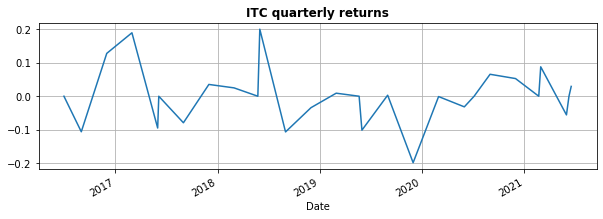

In [103]:
fig = plt.figure()
fig.set_size_inches(10,3)
data["Adj Close"].pct_change().plot()
plt.title("ITC quarterly returns", weight="bold");
plt.grid()

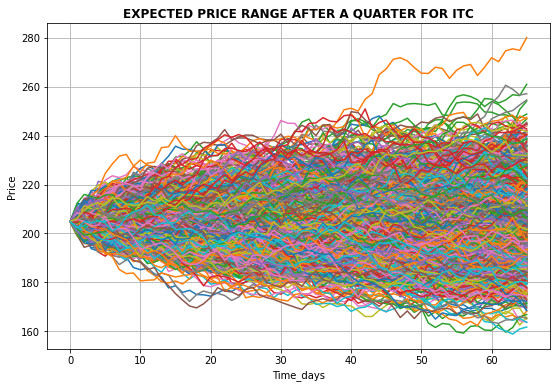

In [104]:
returns=data["Adj Close"].pct_change().dropna()
mean = returns.mean()
sigma = returns.std()
# Monte carlo using the random function with 10000 iterations
days = 66 # weekly
dt = 1/float(days)
sigma = sigma
mu = mean
# function random_walk using the GBM Concept(Geometric Brownian Motion) for risk management. The breakdown for the change in price is such that it has a drift
#and a shock calculated using Historical data Mean and standard deviation for daily, monthly and quarterly returns on the selected stocks
def random_walk(currentstocktprice):
    price = np.zeros(days)
    shock = np.zeros(days)
    price[0] = currentstocktprice
    for i in range(1, days):
        shock[i] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))      # From the GBM Equation
        price[i] = max(0, price[i-1] + shock[i] * price[i-1])
    return price
plt.figure(figsize=(9,6))    
for run in range(1000):
    plt.plot(random_walk(204.850006))   # Last Traded Price
# If I start from today onwards, the simulation is for next 66 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER A QUARTER FOR ITC", weight="bold"); 


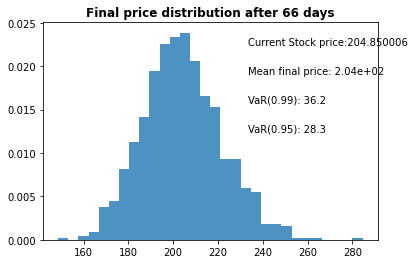

In [105]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(204.850006)[days-1]
q = np.percentile(simulations, 1)     #at 99% confidence
t = np.percentile(simulations,5)      #at 95% confidence
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.8)
plt.figtext(0.6, 0.8, "Current Stock price:204.850006 ")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format( 204.850006 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(204.850006 - t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

# <center>This Marks the End of the Notebook</center>

<b>References:</b>
[1]. https://financetrain.com/calculating-var-using-monte-carlo-simulation/
[2]. https://risk-engineering.org/VaR/
The notebook uses some content directly from [2] which is distributed under the terms of https://creativecommons.org/licenses/by-sa/4.0/ 